# i. Perkanalan

Nama : Akbar Fitriawan  
Batch : HCK-14


Datasets: Insurance Claims over Cars

Context : The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data.

Target : kolom "outcome" adalah 1, itu berarti pelanggan telah mengajukan klaim . Sedangkan jika nilai adalah 0, itu berarti pelanggan tidak mengajukan klaim.


**Conceptual Problems**

- Jelaskan latar belakang adanya bagging dan cara kerja bagging !

- Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !

- Jelaskan apa yang dimaksud dengan Cross Validation !

Jawab:  

- bagging adalah teknik ensamble learning untuk meningkatkan kinerja model dengan cara penggantian (boostrap) di beberapa subset acak dan melatih model di setiap subset tersebut. latar belakang atau tujuan untuk mengurangi varians model dan mencegah overfitting

- perbedaan random forest dan algoritma boosting adalah dalam cara bagaimana mereka menghasilkan subset data pelatihan dan menggabungkan model-modelnya. ya algoritma random forest (bagging) bekerja dengan paralel sedangkan bosting (pelatihan berurutan model) dalam peningkatan berfokus pada perbaikan kesalahan model sebelumnya.

- Cross Validation adalah sebuah teknik yang digunakan untuk mengevaluasi kinerja suatu model machine learning dengan cara membagi dataset menjadi subset-subset yang lebih kecil

# ii. Import Libraries

In [1]:
# library dataframe
import pandas as pd
# library olah data numerical
import numpy as np


# Data visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline


# Pemodelan ML
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Evaluasi model
from sklearn.metrics import ConfusionMatrixDisplay, classification_report , confusion_matrix,precision_score, recall_score, f1_score, accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold



# Library handling outlier
from feature_engine.outliers import Winsorizer
# library statistik
from scipy.stats import pearsonr, kendalltau, spearmanr
# lib pipelines
from sklearn.pipeline import Pipeline


# Save model
import pickle
import joblib
import json

from collections import Counter

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [97]:
# load data
df = pd.read_csv('Car_Insurance_Claim.csv')

In [3]:
# Cek Ukuran
print(f'Datasets memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.')

Datasets memiliki 10000 baris dan 19 kolom.


In [4]:
df['DUIS'].max()

6

In [5]:
df.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


overview data dari 5 teratas

In [6]:
# info Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

**Note:**
- Dataset memiliki type data float64, int64, dan object
- DUIS itu Driving Under the Influence (alcohol, drgus)
- postal code adalah kode pos

In [7]:
# Deskripsi
df.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Cek deskripsi kumpulan data yang menjelaskan nilai minimum, nilai maksimum, nilai rata-rata, jumlah total, standar deviasi, dll.

# iv. Exploratory Data Analysis (EDA)

### Cek Missing Value

In [8]:
df.isnull().sum().sort_values(ascending=False)

CREDIT_SCORE           982
ANNUAL_MILEAGE         957
ID                       0
MARRIED                  0
PAST_ACCIDENTS           0
DUIS                     0
SPEEDING_VIOLATIONS      0
VEHICLE_TYPE             0
POSTAL_CODE              0
CHILDREN                 0
VEHICLE_YEAR             0
AGE                      0
VEHICLE_OWNERSHIP        0
INCOME                   0
EDUCATION                0
DRIVING_EXPERIENCE       0
RACE                     0
GENDER                   0
OUTCOME                  0
dtype: int64

<Axes: >

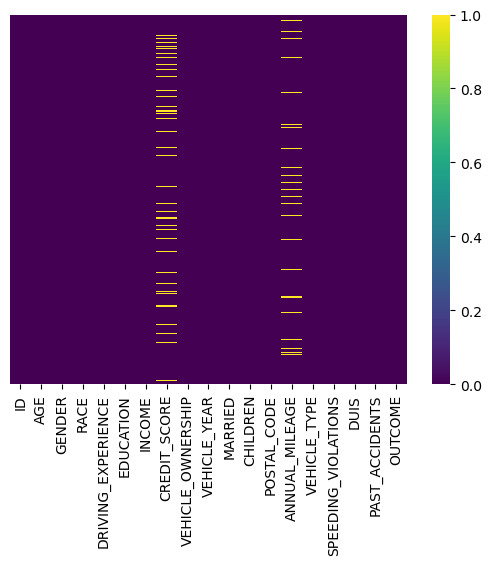

In [9]:
# plot missing value
sns.heatmap(df.isna(),yticklabels=False ,cbar=True, cmap='viridis')

Dua kolom teridentifikasi memiliki missing value CREDIT_SCORE dan ANNUAL_MILEAGE saya asumsiakan tipe hilang adalah MNAR karena alasan privasi


In [10]:
# check cardinality
df.nunique().sort_values(ascending=False)

ID                     10000
CREDIT_SCORE            9018
SPEEDING_VIOLATIONS       21
ANNUAL_MILEAGE            21
PAST_ACCIDENTS            15
DUIS                       7
POSTAL_CODE                4
DRIVING_EXPERIENCE         4
INCOME                     4
AGE                        4
EDUCATION                  3
VEHICLE_TYPE               2
VEHICLE_YEAR               2
CHILDREN                   2
MARRIED                    2
VEHICLE_OWNERSHIP          2
RACE                       2
GENDER                     2
OUTCOME                    2
dtype: int64

### Explore Data

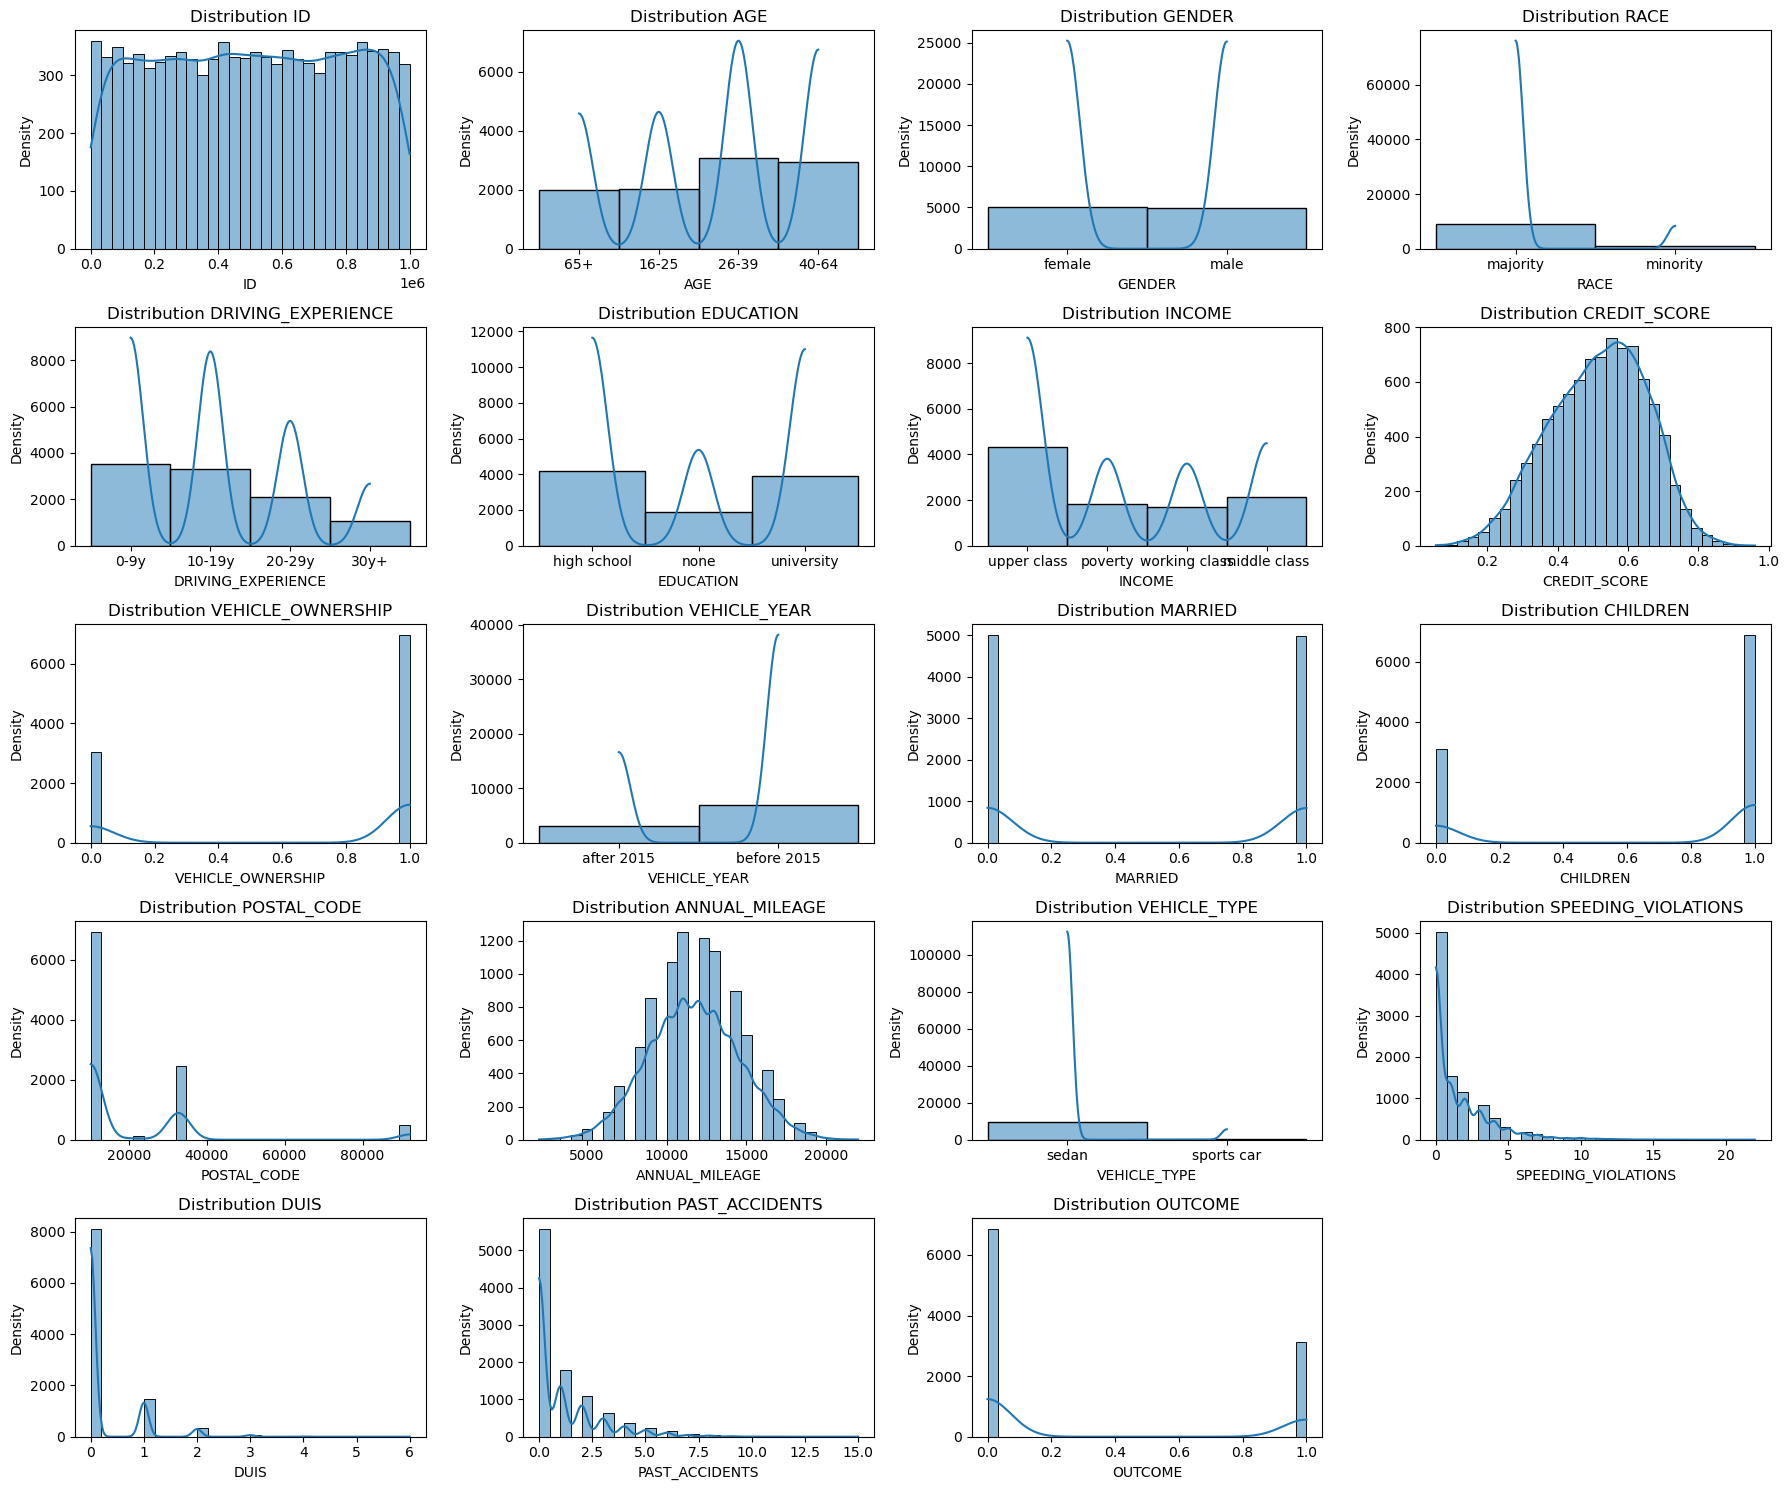

In [11]:
# plot density untuk analisis

# Membuat subplot grid untuk histogram
fig, axes = plt.subplots(5, 4, figsize=(18, 15))

# Flatten axes array
axes = axes.flatten()

# plot di setiap kolom
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], bins=30,kde=True)  # membuat histogram dengan kernel density estimate
    axes[i].set_title(f'Distribution {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

# hapus figure
for j in range(len(df.columns), len(axes)):
    axes[j].remove()

# display
plt.tight_layout()
plt.show()

Dari plot di atas menunjukan density sehingga kolom mana saja yang dapat dijadikan kategori dan numerik.
- categorical: 'AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 
                'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 
                'VEHICLE_TYPE'
- numerical: 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS'

#### Distribusi Data

OUTCOME
0.0    6867
1.0    3133
Name: count, dtype: int64


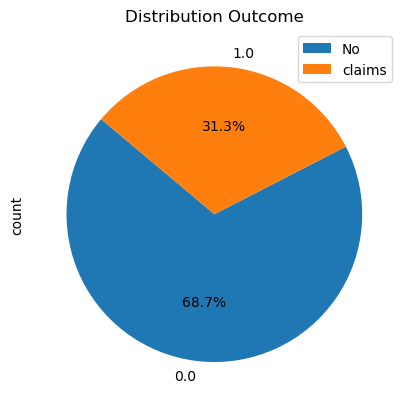

In [107]:
# Outcome atau hasil claims/tidak
outcome = df['OUTCOME'].value_counts()
print(outcome)

outcome.plot(kind='pie', autopct='%1.1f%%', startangle=140).set_title('Distribution Outcome')
plt.legend(labels=['No', 'claims'])
plt.show()

Dari plot di atas 31.3% orang yang mengajukan claim dan 68.7% yang tidak mengajukan claim, target prediksi imbalnced atau tidak seimbang sehingga harus penyasuaian parameter atau metode lain untuk mengatasinya.

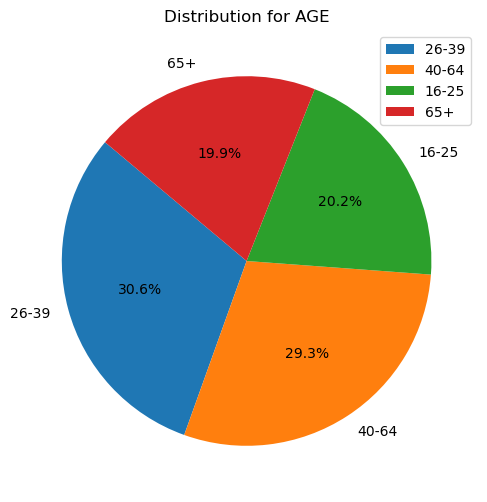

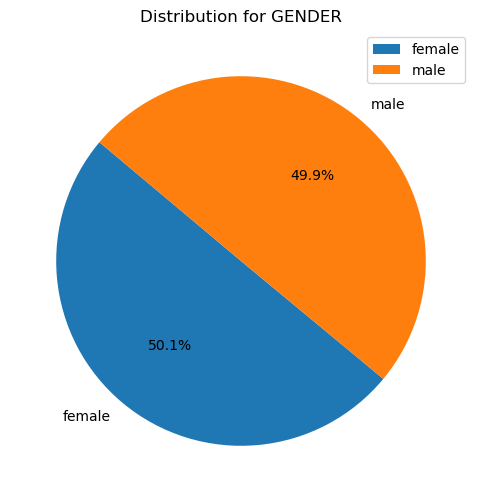

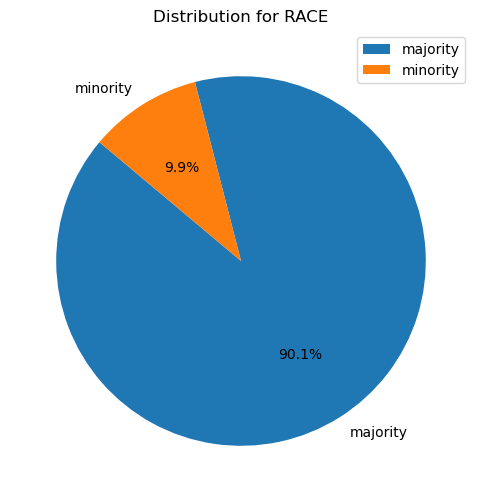

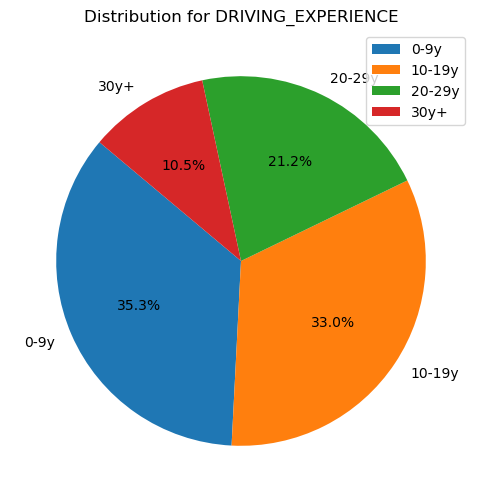

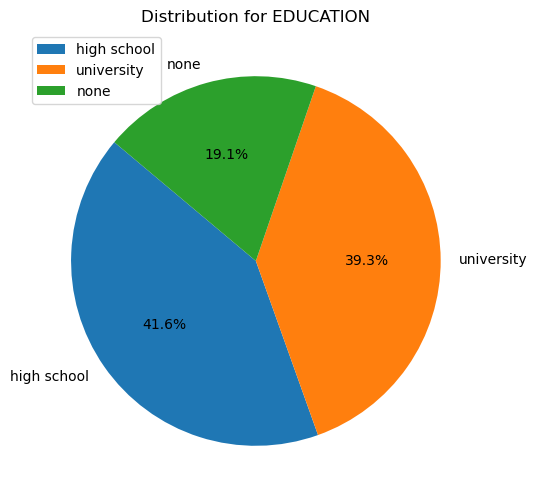

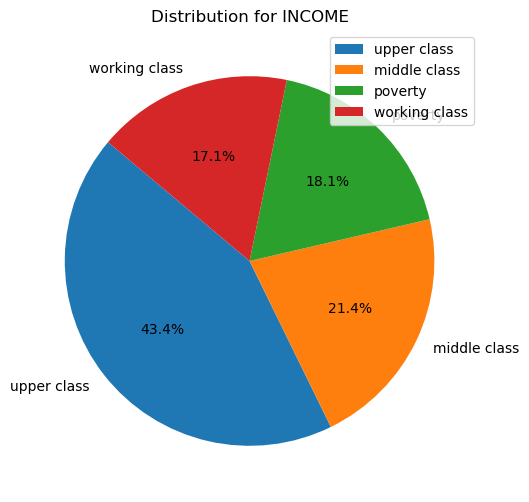

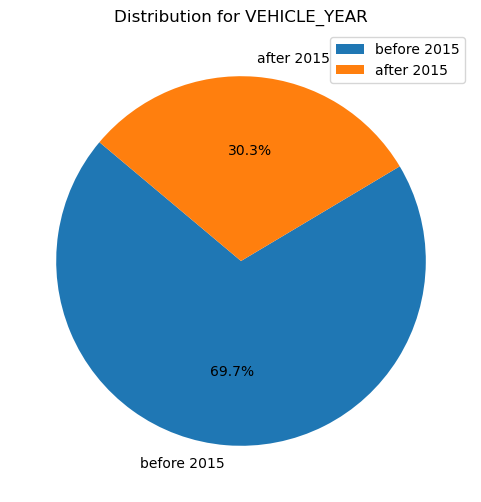

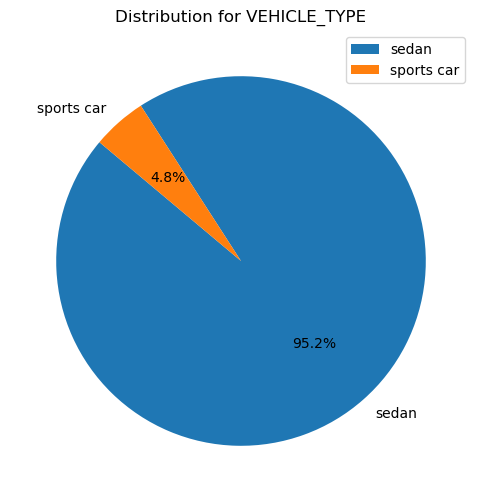

In [13]:
# plot data untuk lihat distribusi
cat_feature = df.select_dtypes(include='object').columns.to_list()

for feature in cat_feature:
    counts = df[feature].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution for {feature}')
    plt.legend()
    plt.show()

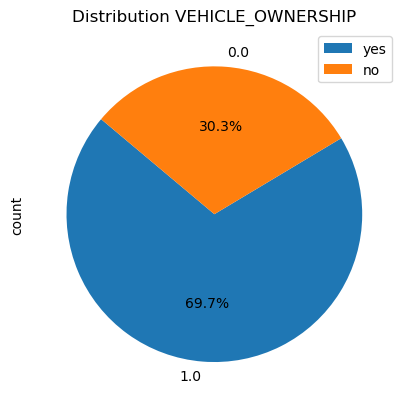

In [14]:
vehicle_ownership = df['VEHICLE_OWNERSHIP'].value_counts()
vehicle_ownership.plot(kind='pie', autopct='%1.1f%%', startangle=140).set_title('Distribution VEHICLE_OWNERSHIP')
plt.legend(labels=['yes', 'no'])
plt.show()

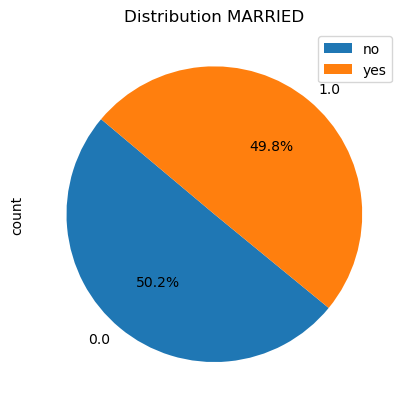

In [15]:
merried = df['MARRIED'].value_counts()
merried.plot(kind='pie', autopct='%1.1f%%', startangle=140).set_title('Distribution MARRIED')
plt.legend(labels=['no', 'yes'])
plt.show()

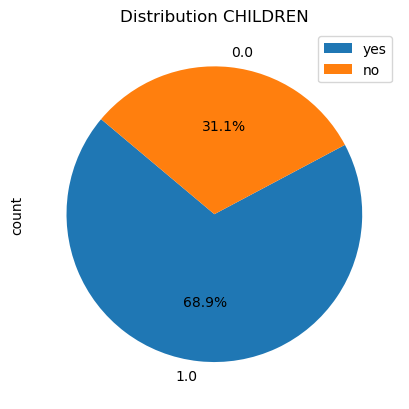

In [16]:
child = df['CHILDREN'].value_counts()
child.plot(kind='pie', autopct='%1.1f%%', startangle=140).set_title('Distribution CHILDREN')
plt.legend(labels=['yes','no'])
plt.show()

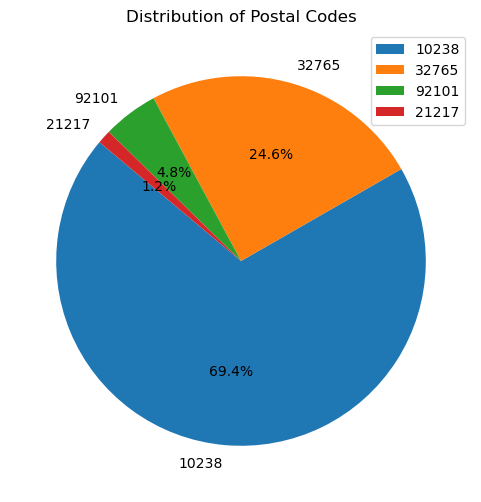

In [17]:
postal_code = df['POSTAL_CODE'].unique()
counts = df['POSTAL_CODE'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=postal_code, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Postal Codes')
plt.legend()
plt.show()

Extract info:
- Age: young `20.2%`, middle age `30.6 %,` old `29.3%`, dan very old `19.9%`
- gender: `50.1%` female, `49.9%` male
- race: `90.1%` majority,` 9.9%` minority
- drive_exp: `35.3%` newbie, `33%` amateure, `21.2%` advanced, `10.5%` expert
- education: `40.6% `high school, university `39.3 %`, none `19.1%`
- income: upper class `43.4%`, middle class `21.4%`, poverty `18.1%`, working class `17.1%`
- vehicle year: before 2015 `64.7%`, after 2015 `30.3%`
- vehicle type: sedan `95.25%`, sport `4.8%`
- vehicle ownership: true `69.7%`, false `30.3%`
- married: true `49.8%,` false `50.2%`
- child: True` 68.9%`, False` 31.1%`
- postal_code: berdasrkan rata-rata dari unique value. 10238 yaitu `69.4%`, 32765 adalah `24.6%`, 92101 adalah `4.8%`, 21217 `1.2%`, postal code mengacu pada zip code.


Dari visualisasi data di atas saya asumsikan bahwa besar kemungkinan mangajukan claim dari usia dewasa 26-19 (middle age) dengan income stabil memiliki anak remaja (high school) yang pengalaman mengemudi kurang dari 10 tahun, jika terjadi sesuatu orang tua mereka yang claim asuransi 

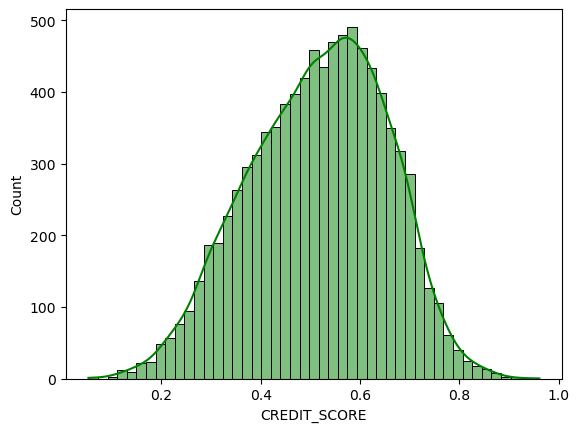

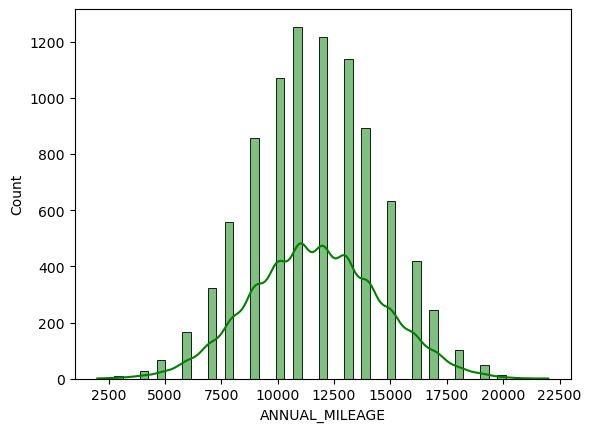

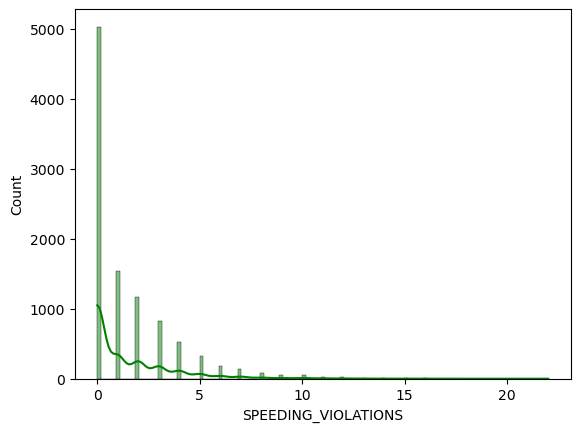

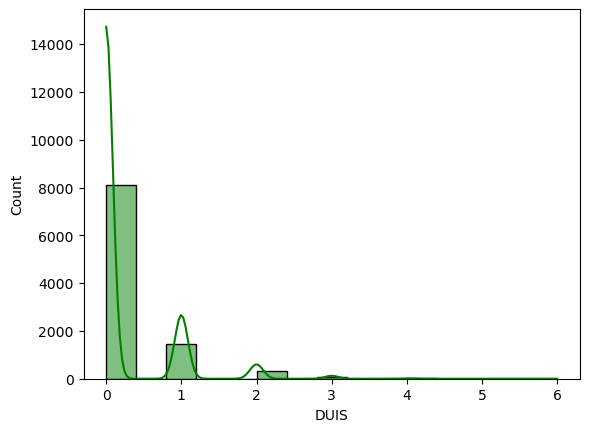

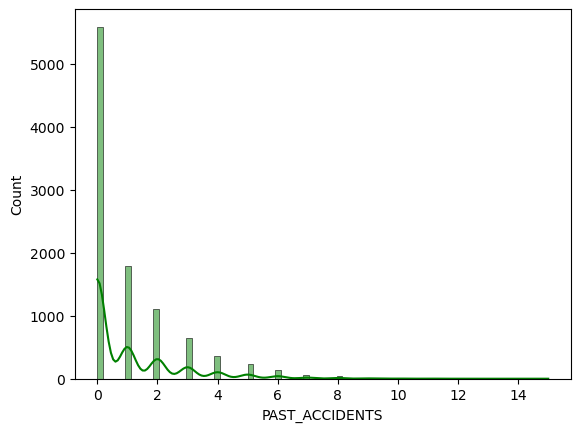

In [18]:
# numeric plot data
num_features = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

for feature in num_features:
    sns.histplot(
        data = df,
        x = feature,
        kde = True,
        color = 'green'
    )
    plt.show()

Dari visualisasi diatas credit score, annual_millage memiliki distribusi normal. speeding_violations, duis, past_accident tinggi di nol yang mana belum mengajukan claim

#### Bivariate Analysis

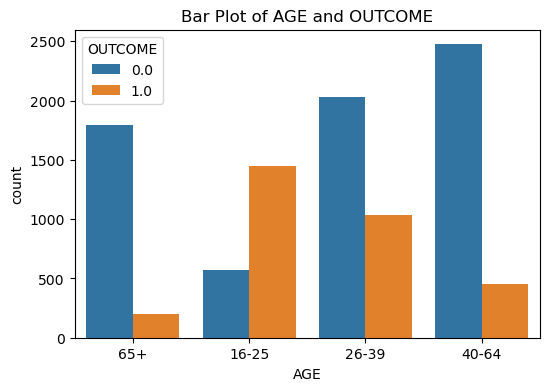

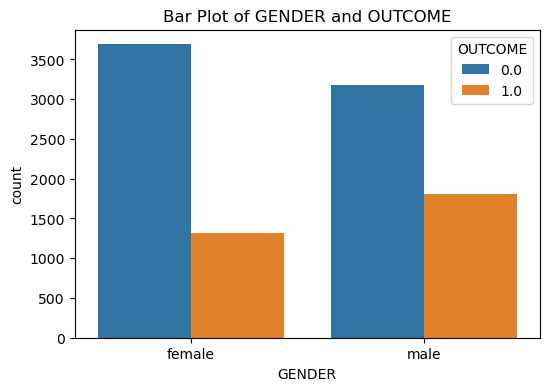

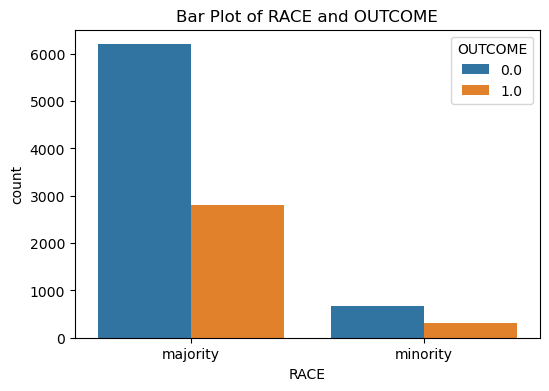

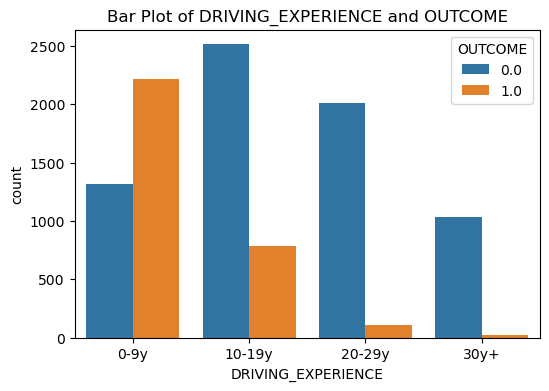

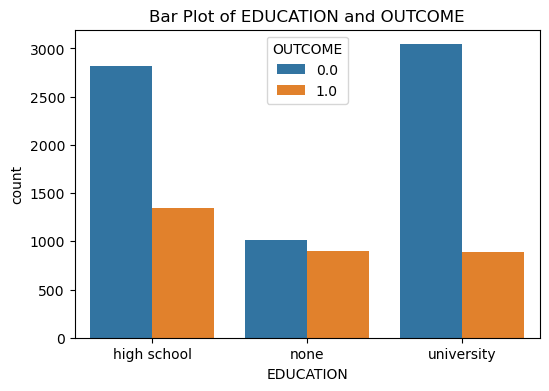

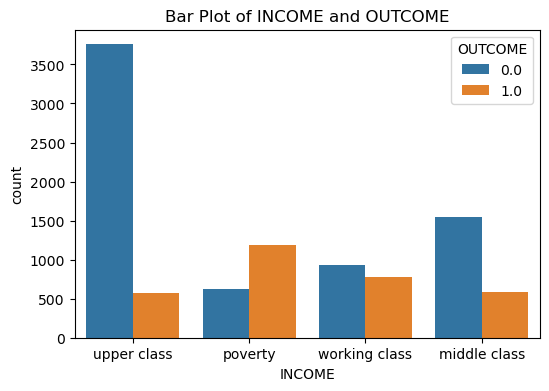

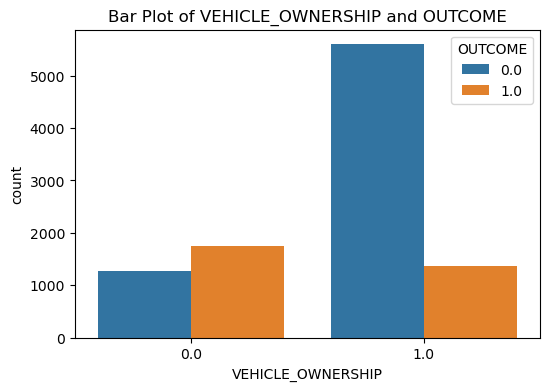

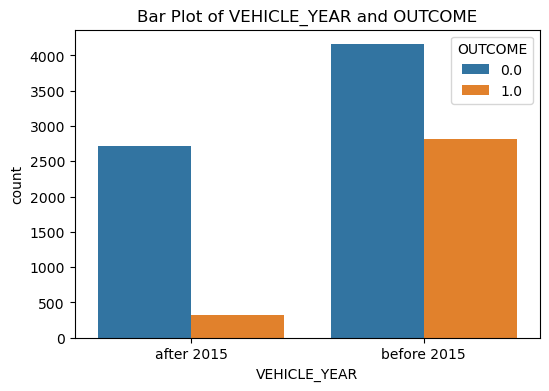

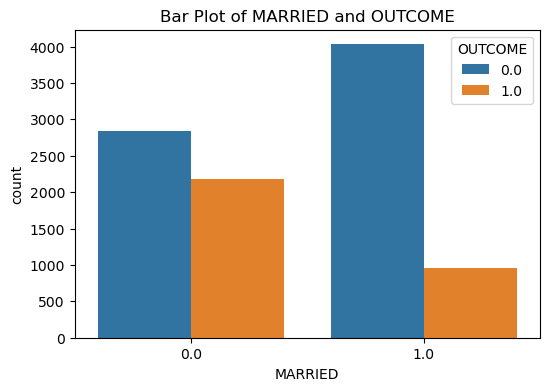

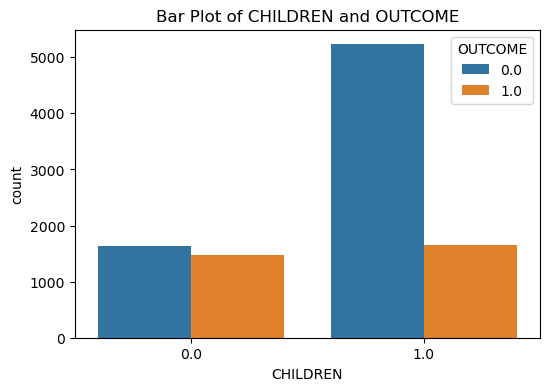

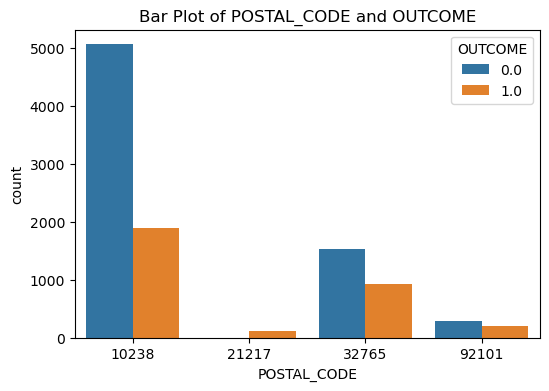

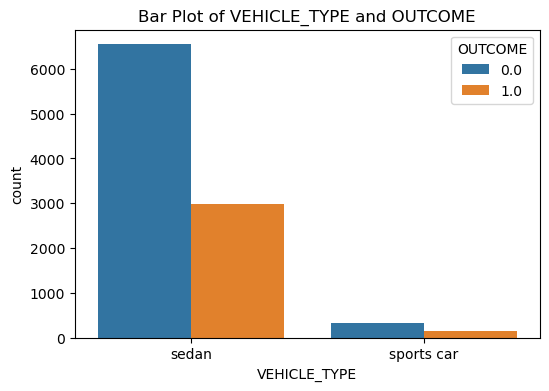

In [19]:
# plot data kategorikal untuk relasi outcome 
cat_features = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 
                'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 
                'VEHICLE_TYPE']

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=feature, hue='OUTCOME', data=df)
    plt.title(f'Bar Plot of {feature} and OUTCOME')
    plt.show()

Dari diagram batang, kita dapat melihat bahwa OUTCOME = 0 unggul dalam beberapa kasus:
- Dari umur 40-64,
- Memiliki pengalaman mengemudi 20+ tahun,
- Dengan pendidikan gelar sarjana,
- Memiliki income tinggi atau upper class,
- kepemilikan kendaraan,
- tahun kendaraan dari 2015,
- menikah dan memiliki anak 

Sedangkan Outcome 1 unggul dalam kasus:
- remaja di usia 16-25
- pengalaman mengemudi kurang dari 10 tahun
- pendidikan high school
- dengan income poverty (tidak stabil)
- bukan mobil milik sendiri
- menikah

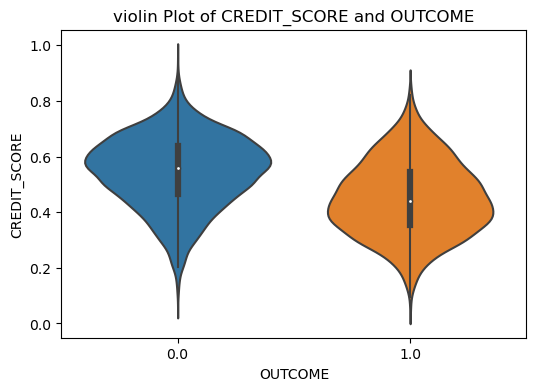

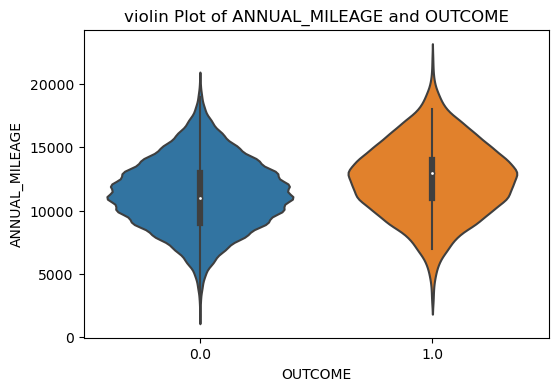

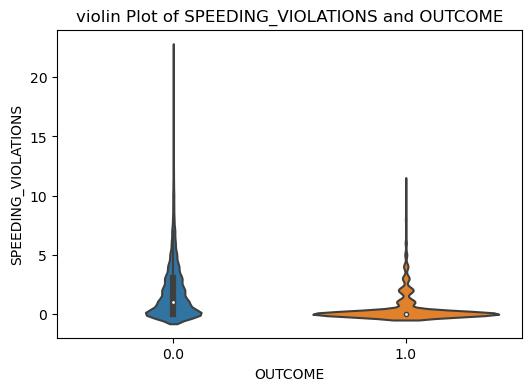

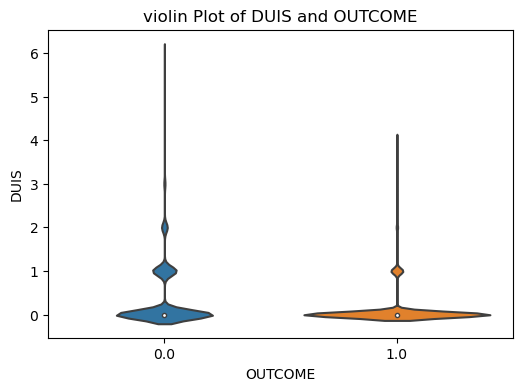

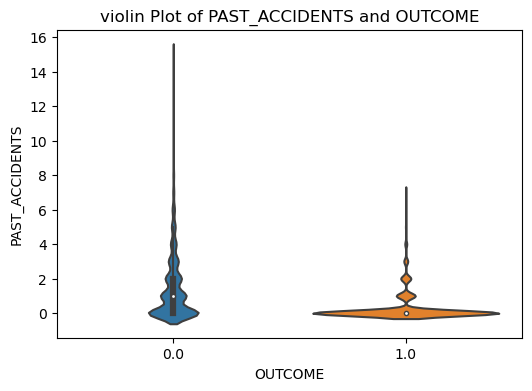

In [20]:
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y=feature,x='OUTCOME', data = df)
    plt.title(f'violin Plot of {feature} and OUTCOME')
    plt.show()

Plotnya menunjukkan bahwa OUTCOME 1 dikaitkan dengan jumlah PAST_ACCIDENTS yang lebih banyak dibandingkan OUTCOME 0.

Kesimpulan yang sama juga berlaku untuk DUIS dan SPEEDING_VIOLATIONS

# v. Faeture Engineering

In [21]:
# Clean data untuk memastikan kategori
df["AGE"].replace({"16-25": "Young", "26-39": "Middle Age","40-64":"Old","65+":"Very Old"}, inplace=True)
df["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)

### Split Data

In [22]:
# drop ID dan Outcome di kolom feature 
X = df.drop(['OUTCOME','ID'], axis=1) # kolom id tidak di perlukan karena tidak memiliki informasi apapun
y = df['OUTCOME']


In [23]:
# Split data ke train dan test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# cek ukuran
print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')
print()
print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

X_train : (8000, 17)
y_train : (8000,)

X_test : (2000, 17)
y_test : (2000,)


In [25]:
# cek class y_train
print('Jumlah class 0.0 : ', sum(y_train == 0.0))
print('Jumlah class 1.0 : ',sum(y_train == 1.0))

Jumlah class 0.0 :  5500
Jumlah class 1.0 :  2500


Distribusi data class target bersifat skewed (data tidak seimbang).

In [26]:
# Cek Duplikat data
print(f"Data Terduplikat {df.duplicated().sum()}")

Data Terduplikat 0


### Handling Missing value

In [27]:
# fill mean ke missing Value
def fillna(dataframe,feature_cols):
    total_cols=0
    for y in feature_cols:
        total_cols+=1
        if dataframe[y].isna().sum()>1:
            try:
                dataframe[y]=dataframe[y].fillna(int(np.mean(dataframe[y])))
            except ValueError:
                pass
        else:
            continue
    print(f"There are {total_cols} columns")

feature_cols=["CREDIT_SCORE","ANNUAL_MILEAGE"]
fillna(X_train,feature_cols)
fillna(X_test,feature_cols)

There are 2 columns
There are 2 columns


Alasan imputer karena data cuma 10% yang hilang dari keseluruhan data dan tipe missing value nya MNAR

In [28]:
# cek setelah missing value di atasi
print('Missing value di X_train',X_train.isnull().sum().sum())
print('Missing value di X_test',X_test.isnull().sum().sum())

Missing value di X_train 0
Missing value di X_test 0


### Handling Outlier

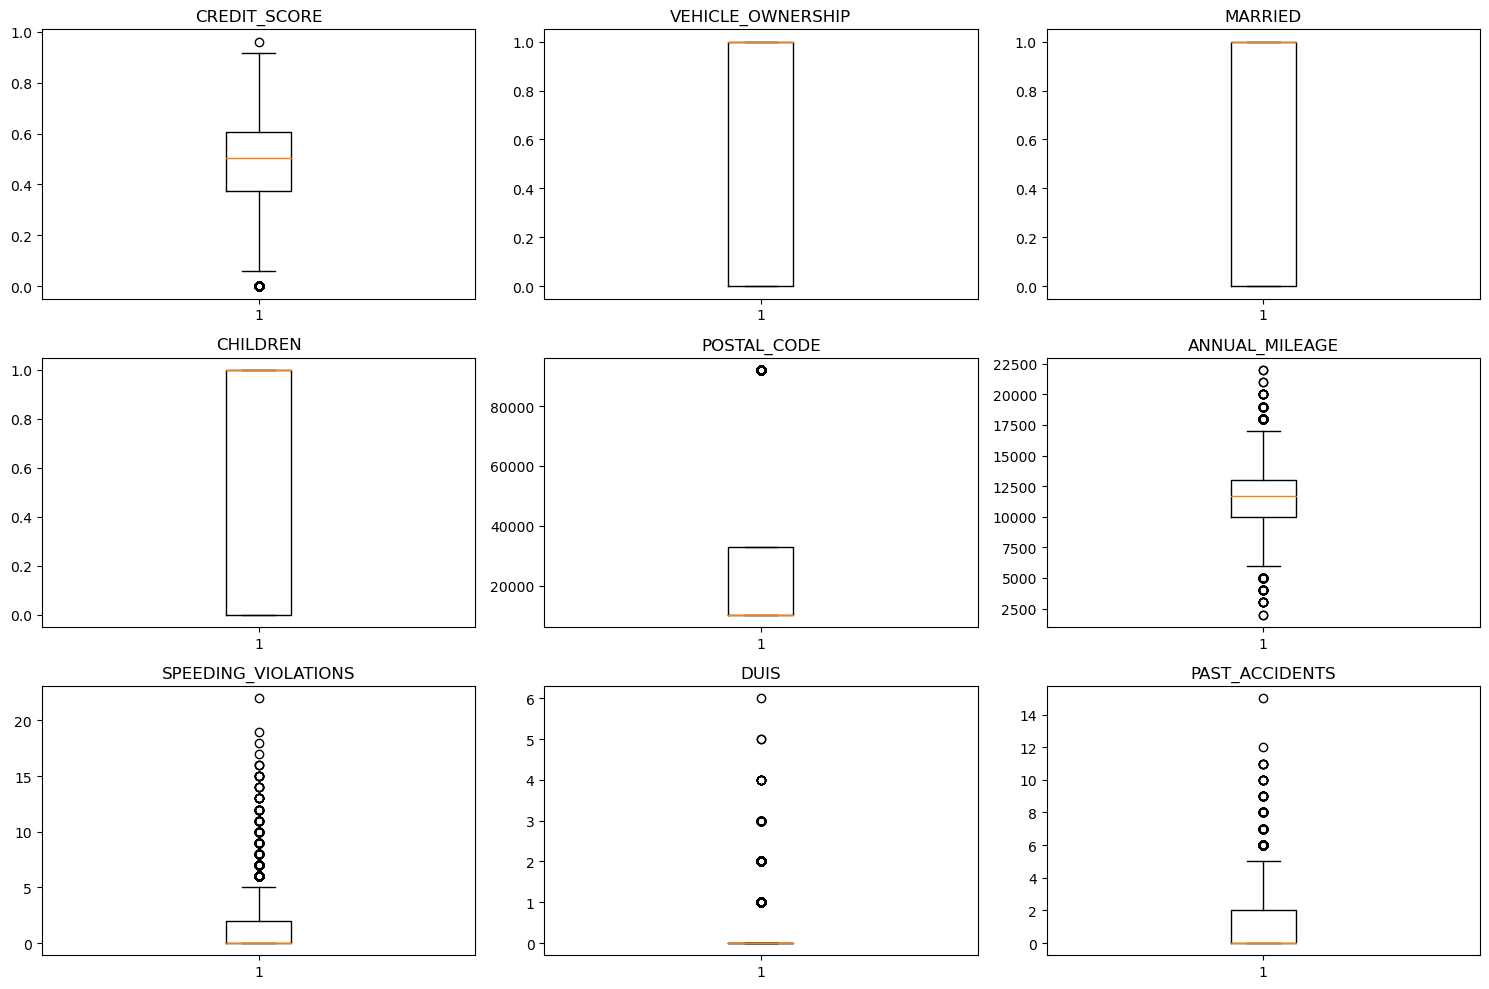

In [29]:
# Cek Outlier
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()

# plot figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(num_cols):
    axes[i].boxplot(X_train[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

In [30]:
# num_cols = X_train.select_dtypes(include='number').columns.tolist()

# Membuat data dan kolom normal distribusi
data_numerik_normal = []
kolom_numerik_normal = []

# Membuat data dan kolom untuk skewed distribution
data_numerik_skewed = []
kolom_numerik_skewed = []

# Looping data di setiap kolom nemrik dan masukan ke data distribusi normal dan Skew ke list
for kolom in num_cols:
    skewness = X_train[kolom].skew()
    
    # if data ditribusi normal
    if skewness <= 0.5 and skewness >= -0.5:            
        kolom_numerik_normal.append(kolom)
        data_numerik_normal.append([kolom, skewness])
        
    # Elif data skew
    elif skewness < -0.5 or skewness > 0.5:
        kolom_numerik_skewed.append(kolom)
        data_numerik_skewed.append([kolom, skewness])

In [31]:
# Tampilkan data normal
pd.DataFrame(data=data_numerik_normal, columns=['kolom_terdistribusi_normal', 'skewness'])

,kolom_terdistribusi_normal,skewness
0,MARRIED,-0.006001
1,ANNUAL_MILEAGE,0.025051


In [32]:
# Tampilkan data skew
pd.DataFrame(data=data_numerik_skewed, columns=['kolom_skewed', 'skewness'])

,kolom_skewed,skewness
0,CREDIT_SCORE,-0.936832
1,VEHICLE_OWNERSHIP,-0.850440
2,CHILDREN,-0.799798
3,POSTAL_CODE,2.684017
4,SPEEDING_VIOLATIONS,2.322754
5,DUIS,2.774828
6,PAST_ACCIDENTS,2.095908


In [33]:
# Masukkan kolom variasi rendah ke dalam variabel
kolom_low_variation = ['DUIS']

# drop kolom variasi rendah di kolom skew, dan tambahkan ke kolom distribusi normal
for kolom in kolom_low_variation:
    kolom_numerik_skewed.remove(kolom) #-> menghapus kolom variasi rendah di kolom miring
    kolom_numerik_normal.append(kolom) #-> menambahkan kolom variasi rendah di kolom terdistribusi normal

In [34]:
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=kolom_numerik_skewed,
                            missing_values='ignore')
# Fit & Transforming X_train
X_train_capped = winsorizer_skewed.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test)

In [35]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_low_variation,
                            missing_values='ignore')

# Fit & Transforming X_train
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)
# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

In [36]:
# Capping Method for Normal Distribution  
winsorizer_normal_dist = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=kolom_numerik_normal,
                            missing_values='ignore')


# Fit & Transforming X_train
X_train_capped = winsorizer_normal_dist.fit_transform(X_train)
# Transforming X_test
X_test_capped = winsorizer_normal_dist.transform(X_test)

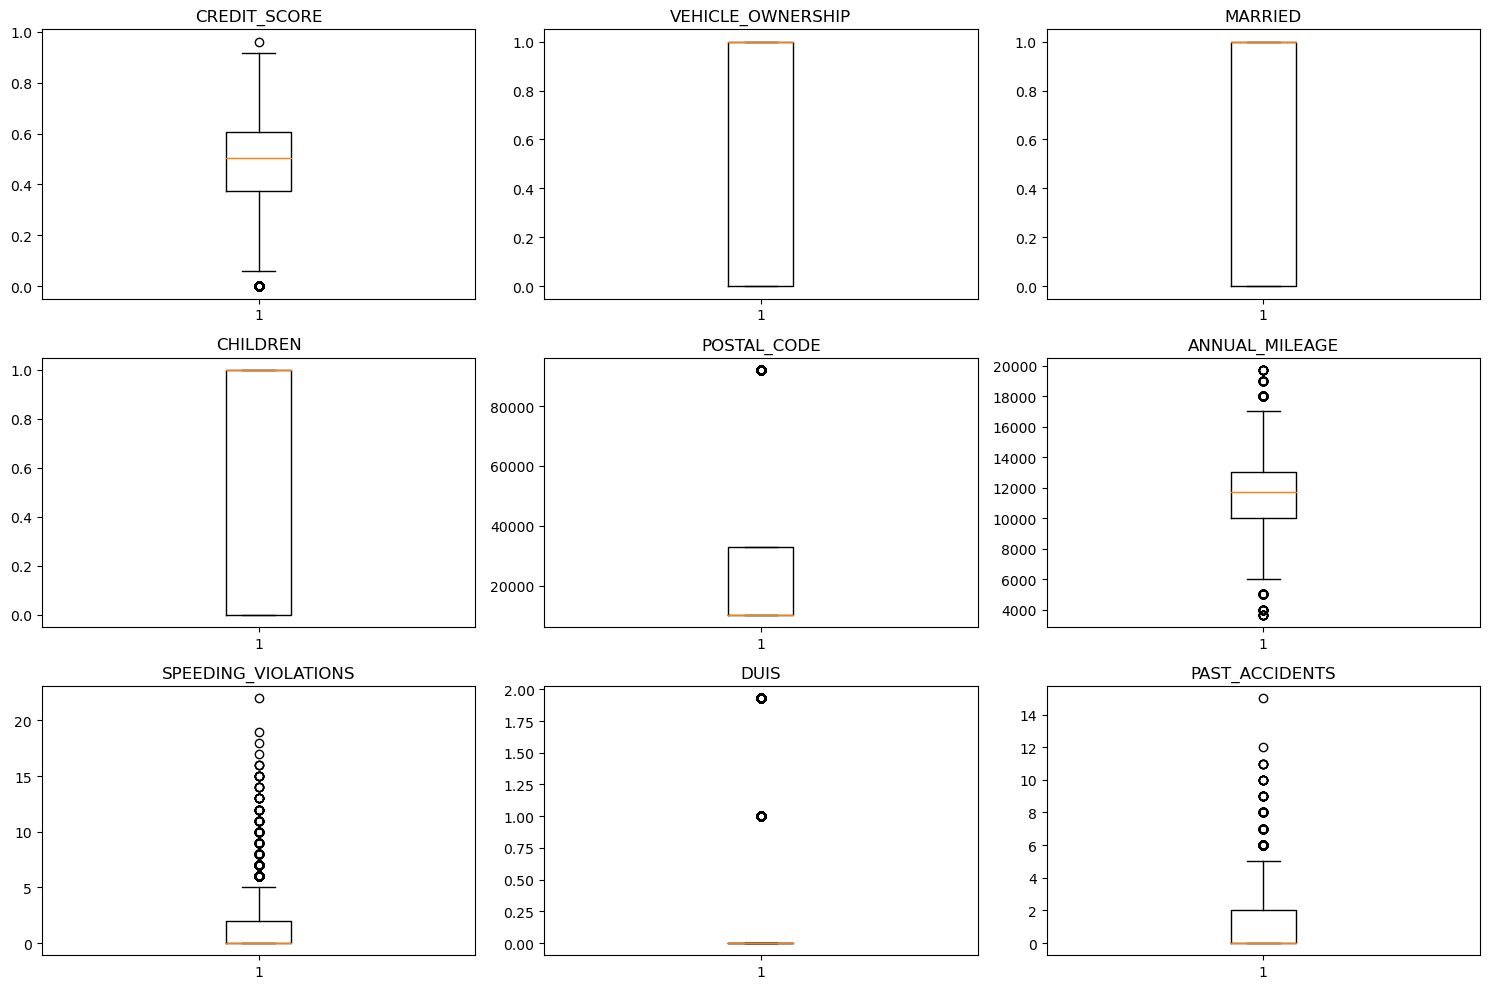

In [37]:
# plot figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()
# membuat boxplot
for i, column in enumerate(num_cols):
    axes[i].boxplot(X_train_capped[column])
    axes[i].set_title(column)

# hapus plot kosong
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
# show plot
plt.show()

### Split Data Numerical and Categorical

In [38]:
num_columns = X_train_capped.select_dtypes(include=np.number).columns.tolist() # membuat list kolom numerik
cat_columns = X_train_capped.select_dtypes(include=['object']).columns.tolist() # membuat list kolom kategorik

print('Categorical Columns :', cat_columns)
print('Numerical Columns :', num_columns)

Categorical Columns : ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR', 'VEHICLE_TYPE']
Numerical Columns : ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']


In [39]:
# masukan kolom split ke X feature
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

### Feature Selection

#### Categorical Features

In [40]:
# Cari korelasi antara katgorikal kolom dan 'outcome'  dengan menggunakan kendall tau
p_values = []
interpretation = []
cols = []
corr = []


for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant Correlation')
  else :
    interpretation.append('No Significant Correlation')

dfCorr= pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfCorr



,Column Name,Correlation Coefficient,P-value,Interpretation
0,AGE,0.159667,6.855613e-55,Significant Correlation
1,GENDER,0.104737,7.434425e-21,Significant Correlation
2,RACE,-0.005575,6.180679e-01,No Significant Correlation
3,DRIVING_EXPERIENCE,0.415560,0.000000e+00,Significant Correlation
4,EDUCATION,-0.093358,1.464616e-18,Significant Correlation
5,INCOME,-0.053901,1.703215e-07,Significant Correlation
6,VEHICLE_YEAR,0.293339,1.049787e-151,Significant Correlation
7,VEHICLE_TYPE,0.001437,8.977248e-01,No Significant Correlation


In [41]:
# filter data yang memiliki korelasi signifikan
dfCorr = dfCorr[dfCorr['Interpretation'] == "Significant Correlation"]
dfCorr 

,Column Name,Correlation Coefficient,P-value,Interpretation
0,AGE,0.159667,6.855613e-55,Significant Correlation
1,GENDER,0.104737,7.434425e-21,Significant Correlation
3,DRIVING_EXPERIENCE,0.415560,0.000000e+00,Significant Correlation
4,EDUCATION,-0.093358,1.464616e-18,Significant Correlation
5,INCOME,-0.053901,1.703215e-07,Significant Correlation
6,VEHICLE_YEAR,0.293339,1.049787e-151,Significant Correlation


In [42]:
corr_cat = dfCorr['Column Name'].values.tolist() # membuat list kolom name yang berkolerasi
corr_cat

['AGE', 'GENDER', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME', 'VEHICLE_YEAR']

In [43]:
# Cari korelasi antara numerik kolom dan 'outcome'  dengan menggunakan pearsonr and spearmanr correlation

p_values = []
interpretation = []
cols = []
corr = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')
  else:                                                     #For Non Normally Distributed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant Correlation')
    else :
      interpretation.append('No Significant Correlation')

dfCorrNum = pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Interpretation': interpretation })

dfCorrNum

,Column Name,Correlation Coefficient,P-value,Interpretation
0,CREDIT_SCORE,-0.258793,1.388364e-122,Significant Correlation
1,VEHICLE_OWNERSHIP,-0.383333,2.217606e-278,Significant Correlation
2,MARRIED,-0.264692,2.369825e-128,Significant Correlation
3,CHILDREN,-0.232386,1.466639e-98,Significant Correlation
4,POSTAL_CODE,0.122544,3.802703e-28,Significant Correlation
5,ANNUAL_MILEAGE,0.183134,2.752237e-61,Significant Correlation
6,SPEEDING_VIOLATIONS,-0.378539,5.899739e-271,Significant Correlation
7,DUIS,-0.205163,8.942872e-77,Significant Correlation
8,PAST_ACCIDENTS,-0.385912,1.991127e-282,Significant Correlation


In [44]:
# extract values dari kolom name jadikan list
corr_num = dfCorrNum['Column Name'].values.tolist()

#### Membuat Variabel Baru untuk Menyimpan Hanya Fitur yang Berkorelasi

In [45]:
# memasukan variabel lagi berdasarkan fitur kategoris dan numerik yang relevan
X_train_cat = X_train_cat[corr_cat]
X_train_num = X_train_num[corr_num]

X_test_cat = X_test_cat[corr_cat]
X_test_num = X_test_num[corr_num]

### Scaling dan Encoding

In [46]:
#Initialize the standarscaler
scaler = StandardScaler()

#Fit_transform for X_train, transform for X_test
X_train_num_scaled = scaler.fit_transform(X_train_num) ## only fit in train
X_test_num_scaled = scaler.transform(X_test_num)

X_train_num_scaled

array([[ 0.40257001,  0.66148028,  0.99700449, ...,  1.11168575,
        -0.45722259,  2.9404349 ],
       [-0.50855235, -1.51176088,  0.99700449, ..., -0.66133777,
        -0.45722259, -0.64245737],
       [ 0.35502993,  0.66148028,  0.99700449, ..., -0.66133777,
        -0.45722259, -0.64245737],
       ...,
       [ 0.8026432 ,  0.66148028,  0.99700449, ..., -0.66133777,
        -0.45722259,  0.55184005],
       [ 1.37289381,  0.66148028,  0.99700449, ..., -0.21808189,
        -0.45722259,  2.34328619],
       [-0.60176739, -1.51176088,  0.99700449, ..., -0.66133777,
        -0.45722259, -0.64245737]])

In [47]:
# Encoding
encoder = OrdinalEncoder()
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

X_train_cat_encoded

array([[2., 0., 2., 0., 2., 0.],
       [0., 1., 3., 1., 1., 1.],
       [0., 0., 3., 2., 0., 1.],
       ...,
       [2., 0., 2., 2., 2., 0.],
       [1., 1., 0., 2., 2., 0.],
       [3., 1., 3., 0., 3., 1.]])

In [48]:
# Concate
X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis = 1)

# Transform into dataframe
X_train_final = pd.DataFrame(X_train_final)
X_test_final = pd.DataFrame(X_test_final)

In [49]:
X_train_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.402570,0.661480,0.997004,0.677143,-0.511636,-1.384201,1.111686,-0.457223,2.940435,2.0,0.0,2.0,0.0,2.0,0.0
1,-0.508552,-1.511761,0.997004,0.677143,-0.511636,-1.009534,-0.661338,-0.457223,-0.642457,0.0,1.0,3.0,1.0,1.0,1.0
2,0.355030,0.661480,0.997004,-1.476792,-0.511636,0.114465,-0.661338,-0.457223,-0.642457,0.0,0.0,3.0,2.0,0.0,1.0
3,0.735801,0.661480,0.997004,-1.476792,0.685773,-1.009534,0.668430,-0.457223,-0.642457,1.0,0.0,1.0,0.0,2.0,0.0
4,0.049376,0.661480,-1.003005,-1.476792,0.685773,0.489132,-0.661338,-0.457223,-0.642457,1.0,1.0,3.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,1.136805,0.661480,0.997004,0.677143,-0.511636,0.863799,0.668430,1.531595,1.148989,2.0,1.0,2.0,0.0,2.0,1.0
7996,0.286109,0.661480,-1.003005,-1.476792,-0.511636,-0.260201,-0.661338,-0.457223,-0.642457,3.0,1.0,3.0,2.0,3.0,0.0
7997,0.802643,0.661480,0.997004,0.677143,-0.511636,-0.000182,-0.661338,-0.457223,0.551840,2.0,0.0,2.0,2.0,2.0,0.0
7998,1.372894,0.661480,0.997004,0.677143,-0.511636,-1.384201,-0.218082,-0.457223,2.343286,1.0,1.0,0.0,2.0,2.0,0.0


In [50]:
X_test_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.383600,-1.511761,0.997004,0.677143,0.685773,-0.260201,-0.218082,-0.457223,-0.642457,0.0,0.0,1.0,0.0,0.0,1.0
1,0.442507,0.661480,0.997004,-1.476792,-0.511636,-1.384201,0.668430,1.531595,1.746137,2.0,0.0,0.0,0.0,2.0,1.0
2,-1.085070,-1.511761,-1.003005,-1.476792,0.685773,0.489132,-0.661338,-0.457223,-0.642457,3.0,0.0,3.0,1.0,1.0,1.0
3,-2.304958,0.661480,-1.003005,-1.476792,-0.511636,0.863799,-0.661338,-0.457223,-0.642457,3.0,1.0,3.0,1.0,1.0,1.0
4,1.117611,0.661480,0.997004,0.677143,-0.511636,-0.634868,0.225174,-0.457223,-0.642457,1.0,0.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1.513674,0.661480,-1.003005,-1.476792,-0.511636,1.987798,-0.661338,-0.457223,-0.642457,3.0,0.0,3.0,2.0,0.0,1.0
1996,0.698423,0.661480,-1.003005,-1.476792,-0.511636,1.238465,-0.661338,1.531595,-0.045309,1.0,1.0,0.0,0.0,0.0,1.0
1997,0.265020,0.661480,0.997004,0.677143,-0.511636,0.114465,-0.218082,-0.457223,1.148989,1.0,1.0,1.0,1.0,3.0,1.0
1998,-0.596934,0.661480,-1.003005,0.677143,-0.511636,1.238465,-0.661338,-0.457223,0.551840,0.0,0.0,1.0,1.0,1.0,1.0


### Balancing dengan SMOTE

In [51]:
# transform the training dataset
oversample = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_train_final, y_train = oversample.fit_resample(X_train_final, y_train)

In [52]:
counter = Counter(y_train)
print(counter)

Counter({0.0: 5500, 1.0: 5500})


Oke data sudah balance

# vi. Modeling 

Oke sebelum modeling alangkah baik memastikan lagi apa tujuan dari project ini sebagai berikut:
- target Outcome binary classification
- Model clasifikasi: KNN, SVM classifier, Decision Tree, Random Forest, Xgboost
- Matric: Fokus Precision karena mengurangi bias terhadap pengajuan klaim atau OUTCOME 1
- Bebarapa penyesuian model seperti cross validate, hyper parameter tuning, boosting dll.

### Baseline model

In [53]:
# definisi model knn
base_knn = KNeighborsClassifier(n_neighbors=5)
# train model
base_knn.fit(X_train_final, y_train)


KNeighborsClassifier()

In [54]:
# definisi model SVC
base_SVC = SVC()
# Train model
base_SVC.fit(X_train_final, y_train)


SVC()

In [55]:
# definisi model Decision tree
base_dectree = DecisionTreeClassifier()
# Train model
base_dectree.fit(X_train_final, y_train)

DecisionTreeClassifier()

In [56]:
# definisi model random forest
base_randFo =  RandomForestClassifier()
# Train model
base_randFo.fit(X_train_final, y_train)

RandomForestClassifier()

In [57]:
# Definisi Model Xgboost
base_xgb = XGBClassifier()
# Train model
base_xgb.fit(X_train_final, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### Base Model Evaluation

In [58]:
# Model Evaluation Utilities

# fungsi evaluasi
def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  print('Precision Score - : ', precision_score(y, y_pred)) # metric precision score
  print('Jumlah class - : ', Counter(y_pred),'\n')
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred))




# Save Classification Report into a Dictionary
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
  """ fungsi metric scoring """
  score_reports = {
      'train - precision' : precision_score(y_train, y_pred_train),
      'train - recall' : recall_score(y_train, y_pred_train),
      'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train, y_pred_train),
      'test - precision' : precision_score(y_test, y_pred_test),
      'test - recall' : recall_score(y_test, y_pred_test),
      'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports


KNN model - Train
Precision Score - :  0.8396166134185303
Jumlah class - :  Counter({1.0: 6260, 0.0: 4740}) 



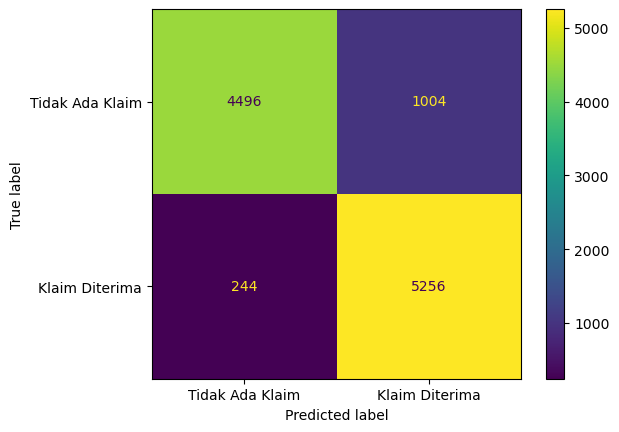

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      5500
         1.0       0.84      0.96      0.89      5500

    accuracy                           0.89     11000
   macro avg       0.89      0.89      0.89     11000
weighted avg       0.89      0.89      0.89     11000


KNN model - Test
Precision Score - :  0.6072319201995012
Jumlah class - :  Counter({0.0: 1198, 1.0: 802}) 



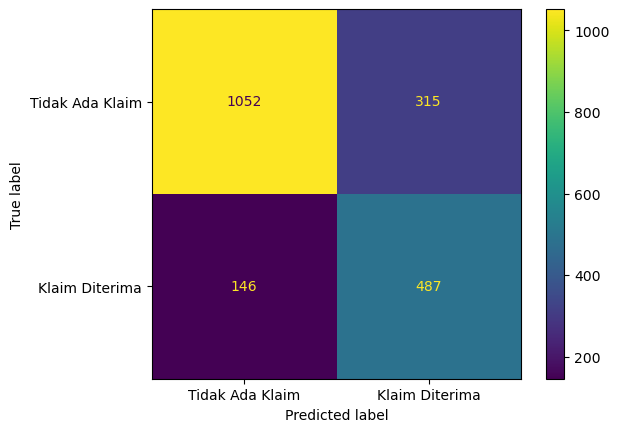

              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      1367
         1.0       0.61      0.77      0.68       633

    accuracy                           0.77      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.79      0.77      0.78      2000



In [59]:
# Evaluasi model KNN
print('KNN model - Train')

performance_check(base_knn, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('KNN model - Test')
performance_check(base_knn, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})



SVM classifier model - Train
Precision Score - :  0.8369546323657222
Jumlah class - :  Counter({1.0: 5753, 0.0: 5247}) 



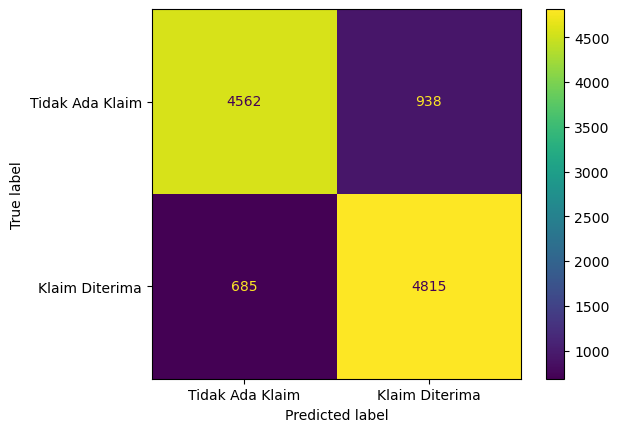

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85      5500
         1.0       0.84      0.88      0.86      5500

    accuracy                           0.85     11000
   macro avg       0.85      0.85      0.85     11000
weighted avg       0.85      0.85      0.85     11000


SVM classifier model - Test
Precision Score - :  0.6871657754010695
Jumlah class - :  Counter({0.0: 1252, 1.0: 748}) 



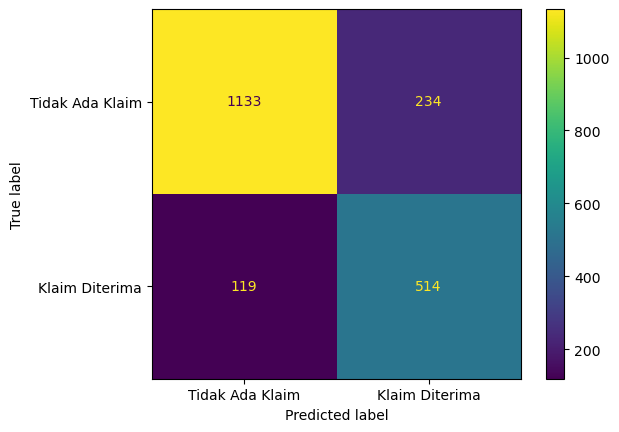

              precision    recall  f1-score   support

         0.0       0.90      0.83      0.87      1367
         1.0       0.69      0.81      0.74       633

    accuracy                           0.82      2000
   macro avg       0.80      0.82      0.80      2000
weighted avg       0.84      0.82      0.83      2000



In [60]:
# Evaluasi model SVM classifier
print('SVM classifier model - Train')
performance_check(base_SVC, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('SVM classifier model - Test')
performance_check(base_SVC, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})

Decision Tree - Train
Precision Score - :  0.9998181818181818
Jumlah class - :  Counter({0.0: 5500, 1.0: 5500}) 



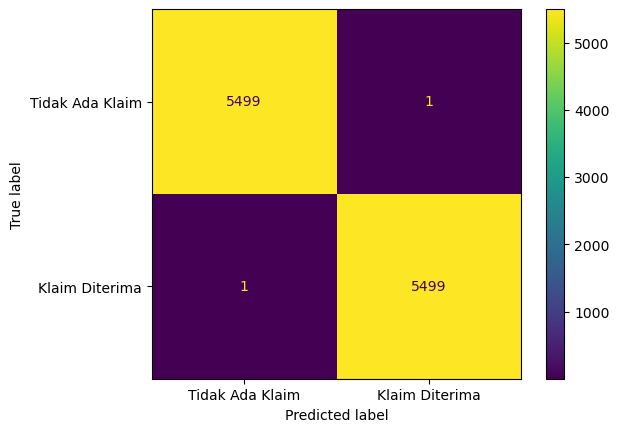

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000


Decision Tree - Test
Precision Score - :  0.6645367412140575
Jumlah class - :  Counter({0.0: 1374, 1.0: 626}) 



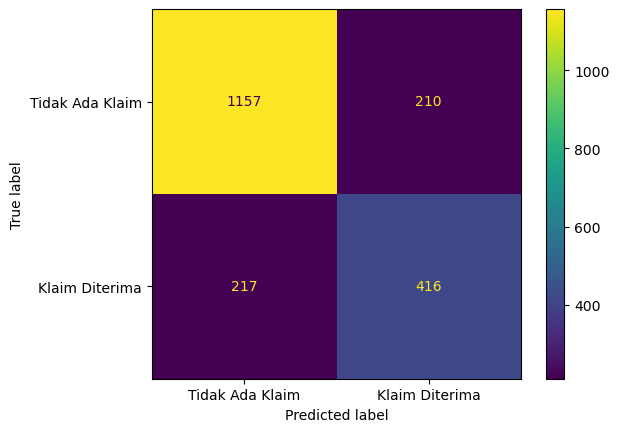

              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1367
         1.0       0.66      0.66      0.66       633

    accuracy                           0.79      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.79      0.79      0.79      2000



In [61]:
# Evaluasi model Decision Tree
print('Decision Tree - Train')
performance_check(base_dectree, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('Decision Tree - Test')
performance_check(base_dectree, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})

Dari klasifikasi report memiliki 1.00. jelas overfitting dilihat dari test yang true positive 0.67

Random forest classifier model - Train
Precision Score - :  0.9998181818181818
Jumlah class - :  Counter({0.0: 5500, 1.0: 5500}) 



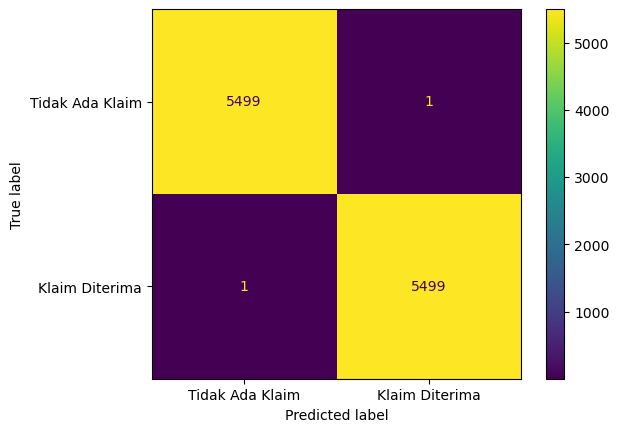

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000


Random forest classifier model - Test
Precision Score - :  0.7521222410865874
Jumlah class - :  Counter({0.0: 1411, 1.0: 589}) 



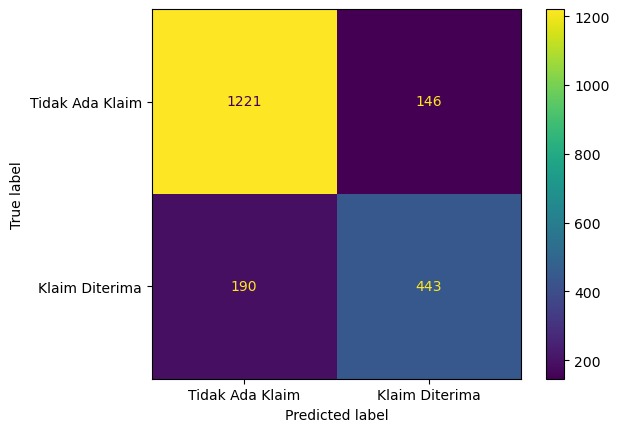

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1367
         1.0       0.75      0.70      0.73       633

    accuracy                           0.83      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.83      0.83      0.83      2000



In [62]:
# Evaluasi model Random forest
print('Random forest classifier model - Train')
performance_check(base_randFo, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('Random forest classifier model - Test')
performance_check(base_randFo, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})

Sama dengan random forest overfitting tapi di test memiliki proporsi selisih lebih sedikit

Xgboost classifier - Train
Precision Score - :  0.946018172100481
Jumlah class - :  Counter({1: 5613, 0: 5387}) 



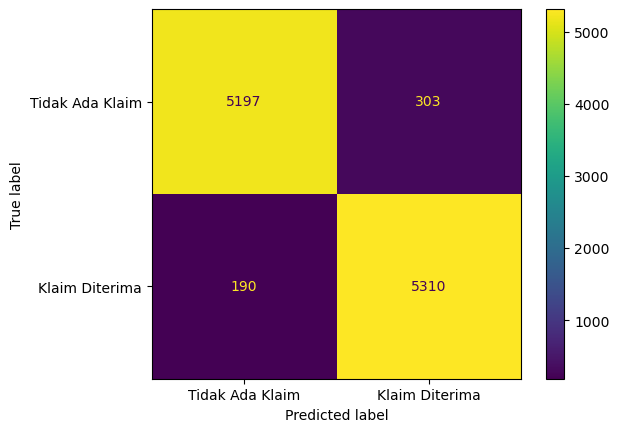

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      5500
         1.0       0.95      0.97      0.96      5500

    accuracy                           0.96     11000
   macro avg       0.96      0.96      0.96     11000
weighted avg       0.96      0.96      0.96     11000


Xgboost classifier - Test
Precision Score - :  0.7210365853658537
Jumlah class - :  Counter({0: 1344, 1: 656}) 



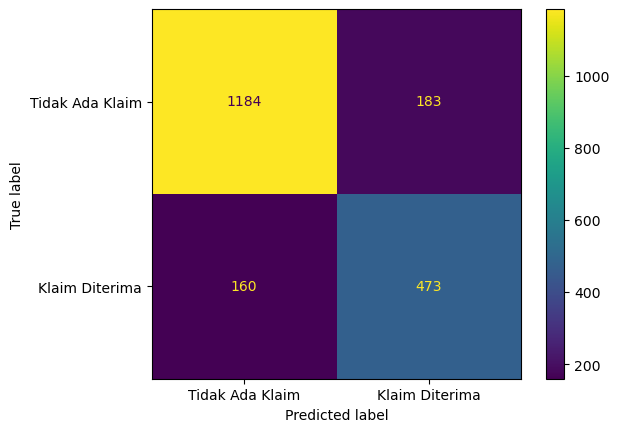

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1367
         1.0       0.72      0.75      0.73       633

    accuracy                           0.83      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.83      0.83      0.83      2000



In [63]:
# Evaluasi model Xgboost
print('Xgboost classifier - Train')

performance_check(base_xgb, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('Xgboost classifier - Test')
performance_check(base_xgb, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})

### Cross Validate Score


Dari sini saya harus memastikan bahwa model adalah balance atau pun tidak bias dan tidak overfitting. dengan menggunakan cross_val_score untuk metodenya
dan mencoba ke semua model untuk melihat nilai stabil dari model.

In [64]:
# Cross Validation using `cross_val_score`  dan Kfold


# Definisi KFold
kf_knn = KFold(n_splits=5, shuffle=True, random_state=42) # set fold 5

# Model KNN
knn_cross_val = cross_val_score(base_knn,
                                     X_train_final,
                                     y_train,
                                     cv=kf_knn,
                                     scoring='precision')


# tampilkan hasil
print('Precision score - All - Cross Validation  : ', knn_cross_val)
print('Precision score - Mean - Cross Validation : ', knn_cross_val.mean())
print('Precision score - Std - Cross Validation  : ', knn_cross_val.std())
print('Precision score - Range of Test-Set       : ', (knn_cross_val.mean()-knn_cross_val.std()) , '-', (knn_cross_val.mean()+knn_cross_val.std()))


Precision score - All - Cross Validation  :  [0.78532397 0.78687196 0.77623457 0.78881988 0.78649068]
Precision score - Mean - Cross Validation :  0.7847482107322774
Precision score - Std - Cross Validation  :  0.0044031486518511425
Precision score - Range of Test-Set       :  0.7803450620804263 - 0.7891513593841285


In [65]:
# Cross Validation using `cross_val_score` 

# Definisi KFold
kf_svc = KFold(n_splits=5, shuffle=True, random_state=42)
# Model SVM classifier
svc_cross_val = cross_val_score(base_SVC,
                                     X_train_final,
                                     y_train,
                                     cv=kf_svc,
                                     scoring="precision")

print('Precision score - All - Cross Validation  : ', svc_cross_val)
print('Precision score - Mean - Cross Validation : ', svc_cross_val.mean())
print('Precision score - Std - Cross Validation  : ', svc_cross_val.std())
print('Precision score - Range of Test-Set       : ', (svc_cross_val.mean()-svc_cross_val.std()) , '-', (svc_cross_val.mean()+svc_cross_val.std()))

Precision score - All - Cross Validation  :  [0.83377078 0.81785714 0.80904523 0.83333333 0.82986111]
Precision score - Mean - Cross Validation :  0.824773518416982
Precision score - Std - Cross Validation  :  0.009750078478670238
Precision score - Range of Test-Set       :  0.8150234399383117 - 0.8345235968956523


In [66]:
# Cross Validation using `cross_val_score`  dan Kfold


# Definisi KFold
kf_dt = KFold(n_splits=5, shuffle=True, random_state=42)

# Model decision tree
dt_cross_val = cross_val_score(base_dectree,
                                     X_train_final,
                                     y_train,
                                     cv=kf_dt,
                                     scoring='precision')

print('Precision score - All - Cross Validation  : ', dt_cross_val)
print('Precision score - Mean - Cross Validation : ', dt_cross_val.mean())
print('Precision score - Std - Cross Validation  : ', dt_cross_val.std())
print('Precision score - Range of Test-Set       : ', (dt_cross_val.mean()-dt_cross_val.std()) , '-', (dt_cross_val.mean()+dt_cross_val.std()))

Precision score - All - Cross Validation  :  [0.83985441 0.84088807 0.82651246 0.84670232 0.84234647]
Precision score - Mean - Cross Validation :  0.8392607447283578
Precision score - Std - Cross Validation  :  0.0067884932949627075
Precision score - Range of Test-Set       :  0.8324722514333951 - 0.8460492380233204


In [67]:
# Cross Validation using `cross_val_score`  dan Kfold


# Definisi KFold
kf_ranfo = KFold(n_splits=5, shuffle=True, random_state=42)

# Model random forest
rand_cross_val = cross_val_score(base_randFo,
                                     X_train_final,
                                     y_train,
                                     cv=kf_ranfo,
                                     scoring='precision')

print('Precision score - All - Cross Validation  : ', rand_cross_val)
print('Precision score - Mean - Cross Validation : ', rand_cross_val.mean())
print('Precision score - Std - Cross Validation  : ', rand_cross_val.std())
print('Precision score - Range of Test-Set       : ', (rand_cross_val.mean()-rand_cross_val.std()) , '-', (rand_cross_val.mean()+rand_cross_val.std()))

Precision score - All - Cross Validation  :  [0.88434164 0.87072946 0.86614173 0.89276139 0.89246324]
Precision score - Mean - Cross Validation :  0.881287490781425
Precision score - Std - Cross Validation  :  0.011015821780222474
Precision score - Range of Test-Set       :  0.8702716690012026 - 0.8923033125616474


In [68]:
# Cross Validation using `cross_val_score`  dan Kfold


# Definisi KFold
kf_xgb = KFold(n_splits=5, shuffle=True, random_state=42)

# Model Xgb
xgb_cross_val = cross_val_score(base_xgb,
                                     X_train_final,
                                     y_train,
                                     cv=kf_xgb,
                                     scoring='precision')

print('Precision score - All - Cross Validation  : ', xgb_cross_val)
print('Precision score - Mean - Cross Validation : ', xgb_cross_val.mean())
print('Precision score - Std - Cross Validation  : ', xgb_cross_val.std())
print('Precision score - Range of Test-Set       : ', (xgb_cross_val.mean()-xgb_cross_val.std()) , '-', (xgb_cross_val.mean()+xgb_cross_val.std()))

Precision score - All - Cross Validation  :  [0.87918871 0.86531365 0.86375546 0.87828371 0.8852459 ]
Precision score - Mean - Cross Validation :  0.8743574877195588
Precision score - Std - Cross Validation  :  0.008384598991668867
Precision score - Range of Test-Set       :  0.8659728887278899 - 0.8827420867112277


In [69]:
print(f"""
KNN : {knn_cross_val.mean()}

SVC : {svc_cross_val.mean()}

Decision Tree : {dt_cross_val.mean()}

Random forest : {rand_cross_val.mean()}

Xgboost : {xgb_cross_val.mean()}""")


KNN : 0.7847482107322774

SVC : 0.824773518416982

Decision Tree : 0.8392607447283578

Random forest : 0.881287490781425

Xgboost : 0.8743574877195588


In [70]:
# penggunaan fungsi performance_report 
all_reports = {}

# Melakukan laporan kinerja untuk model KNN
all_reports = performance_report(all_reports, y_train, base_knn.predict(X_train_final), y_test, base_knn.predict(X_test_final), 'KNN')

# Melakukan laporan kinerja untuk model SVC
all_reports = performance_report(all_reports, y_train, base_SVC.predict(X_train_final), y_test, base_SVC.predict(X_test_final), 'SVC')

# Melakukan laporan kinerja untuk model Decision Tree
all_reports = performance_report(all_reports, y_train,base_dectree.predict(X_train_final), y_test, base_dectree.predict(X_test_final), 'Decision Tree')

# Melakukan laporan kinerja untuk model Random Forest
all_reports = performance_report(all_reports, y_train, base_randFo.predict(X_train_final), y_test, base_randFo.predict(X_test_final), 'Random Forest')

# Melakukan laporan kinerja untuk model XGBoost
all_reports = performance_report(all_reports, y_train, base_xgb.predict(X_train_final), y_test, base_xgb.predict(X_test_final), 'XGBoost')

# Membuat DataFrame dari dictionary all_reports
df_report_base_model = pd.DataFrame(all_reports)

# Melihat semua laporan kinerja
print(all_reports)


{'KNN': {'train - precision': 0.8396166134185303, 'train - recall': 0.9556363636363636, 'train - accuracy': 0.8865454545454545, 'train - f1_score': 0.8938775510204081, 'test - precision': 0.6072319201995012, 'test - recall': 0.7693522906793049, 'test - accuracy_score': 0.7695, 'test - f1_score': 0.6787456445993031}, 'SVC': {'train - precision': 0.8369546323657222, 'train - recall': 0.8754545454545455, 'train - accuracy': 0.8524545454545455, 'train - f1_score': 0.8557717941882165, 'test - precision': 0.6871657754010695, 'test - recall': 0.8120063191153238, 'test - accuracy_score': 0.8235, 'test - f1_score': 0.7443881245474294}, 'Decision Tree': {'train - precision': 0.9998181818181818, 'train - recall': 0.9998181818181818, 'train - accuracy': 0.9998181818181818, 'train - f1_score': 0.9998181818181818, 'test - precision': 0.6645367412140575, 'test - recall': 0.6571879936808847, 'test - accuracy_score': 0.7865, 'test - f1_score': 0.6608419380460683}, 'Random Forest': {'train - precision':

In [71]:
df_report_base_model

,KNN,SVC,Decision Tree,Random Forest,XGBoost
train - precision,0.839617,0.836955,0.999818,0.999818,0.946018
train - recall,0.955636,0.875455,0.999818,0.999818,0.965455
train - accuracy,0.886545,0.852455,0.999818,0.999818,0.955182
train - f1_score,0.893878,0.855772,0.999818,0.999818,0.955638
test - precision,0.607232,0.687166,0.664537,0.752122,0.721037
test - recall,0.769352,0.812006,0.657188,0.699842,0.747235
test - accuracy_score,0.769500,0.823500,0.786500,0.832000,0.828500
test - f1_score,0.678746,0.744388,0.660842,0.725041,0.733902


**Kesimpulan**  
Dari model evaluasi berdasarkan metric precision Random forest lebih unggul dari yang lain nya dengan prediksi test `75%` dan cross_val_score berdasarkan rata-rata `88%`. dari model random forest dan decision tree memiliki report 100% di training saya asumsikan overfitting karena data nya terlalu balance, sehingga harus melakukan beberapa penyesuian hyper tuning, lakukan lagi resample, atau lakukan ensamble learning.

rekap precision:
- KNN: pred train = `84%` dan pred test = `61%`
- SVM: pred train = `83%` dan pred test =  `68%`
- DecTree: pred train = `99%` dan pred test = `67%`
- Random forest: pred train = `99%` dan pred test = `75%`
- Xgboost: pred train = `94%` dan pred test = `72%`


### Hyperparameter Tuning


Mencari nilai parameter terbaik 

In [72]:
# Parameter grid untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': [None, 'balanced']
}


In [73]:
# Train with Grid Search

# Model Random forest
randfo_grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=rf_param_grid,
                         cv=kf_ranfo,
                         n_jobs=-1,
                         verbose=2,
                         scoring='precision')

randfo_grid_search.fit(X_train_final, y_train)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='precision', verbose=2)

In [74]:
# Get Best Hyperparameters
randfo_grid_search.best_params_

{'bootstrap': False,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [75]:
# memasukan model dengan parameter terbaik
randfo_tuned = randfo_grid_search.best_estimator_

#### Sebelum Tunning

Random Forest - Train
Precision Score - :  0.9998181818181818
Jumlah class - :  Counter({0.0: 5500, 1.0: 5500}) 



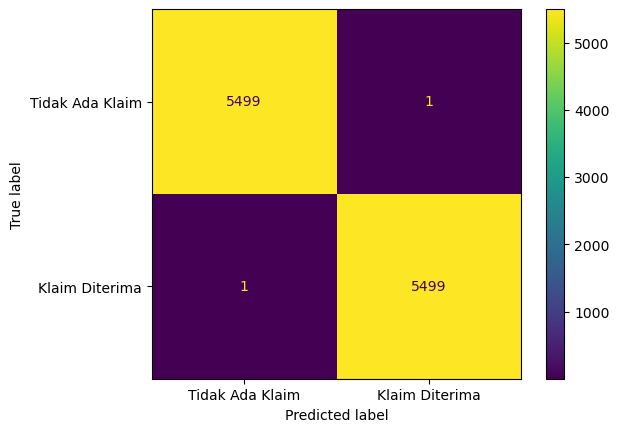

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000


Random Forest - Test
Precision Score - :  0.7521222410865874
Jumlah class - :  Counter({0.0: 1411, 1.0: 589}) 



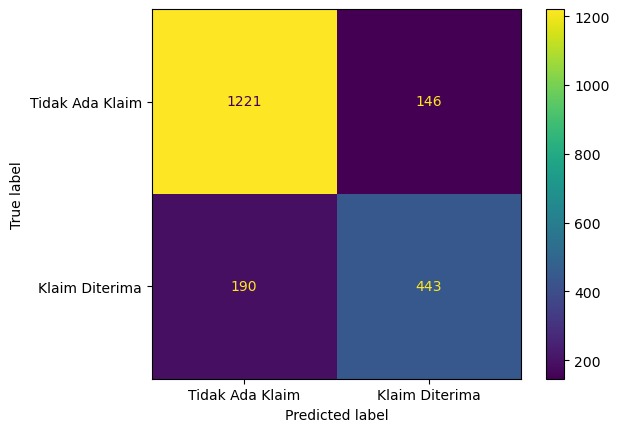

              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88      1367
         1.0       0.75      0.70      0.73       633

    accuracy                           0.83      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.83      0.83      0.83      2000



In [76]:
# Evaluasi model random forest
print('Random Forest - Train')

performance_check(base_randFo, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('Random Forest - Test')
performance_check(base_randFo, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})

In [77]:
# Cross Val Score sebelum
rand_cross_val.mean()

0.881287490781425

#### Sesudah Tunning

Random Forest - Train
Precision Score - :  0.9998181818181818
Jumlah class - :  Counter({0.0: 5500, 1.0: 5500}) 



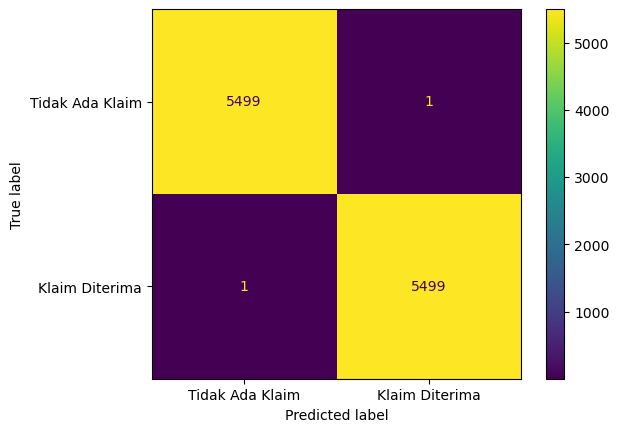

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5500
         1.0       1.00      1.00      1.00      5500

    accuracy                           1.00     11000
   macro avg       1.00      1.00      1.00     11000
weighted avg       1.00      1.00      1.00     11000


Random Forest - Test
Precision Score - :  0.7544483985765125
Jumlah class - :  Counter({0.0: 1438, 1.0: 562}) 



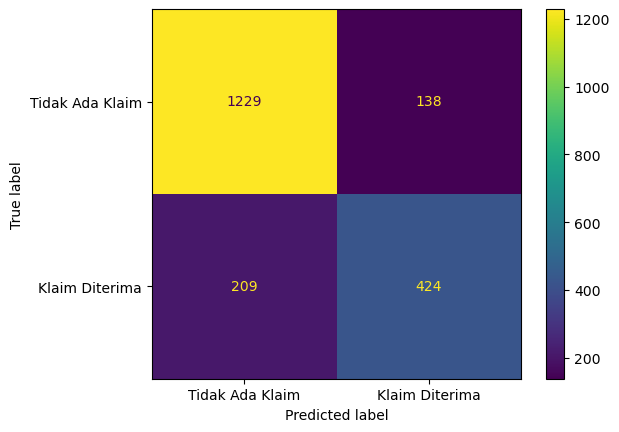

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      1367
         1.0       0.75      0.67      0.71       633

    accuracy                           0.83      2000
   macro avg       0.80      0.78      0.79      2000
weighted avg       0.82      0.83      0.82      2000



In [78]:
# Evaluasi model random forest
print('Random Forest - Train')

performance_check(randfo_tuned, X_train_final, y_train, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})
print('')

print('Random Forest - Test')
performance_check(randfo_tuned, X_test_final, y_test, classes={'Tidak Ada Klaim':0.0, 'Klaim Diterima':1.0})

In [79]:
# Model random forest
rand_cross_val_tunned = cross_val_score(randfo_tuned,
                                     X_train_final,
                                     y_train,
                                     cv=3,
                                     scoring='precision')

print('Precision score - All - Cross Validation  : ', rand_cross_val_tunned)
print('Precision score - Mean - Cross Validation : ', rand_cross_val_tunned.mean())
print('Precision score - Std - Cross Validation  : ', rand_cross_val_tunned.std())
print('Precision score - Range of Test-Set       : ', (rand_cross_val_tunned.mean()-rand_cross_val_tunned.std()) , '-', (rand_cross_val_tunned.mean()+rand_cross_val_tunned.std()))

Precision score - All - Cross Validation  :  [0.88926401 0.88500806 0.86813187]
Precision score - Mean - Cross Validation :  0.8808013130393589
Precision score - Std - Cross Validation  :  0.009125583255137138
Precision score - Range of Test-Set       :  0.8716757297842218 - 0.8899268962944961


**kesimpulan**

Dari hasil tunnnig dan hasil sebelum base model tidak ada peningkatan signifikan

### Build Model dengan pipeline

In [80]:
# Split data ke train dan test 
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Membuat transformer pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # scaling
])


categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())  # ordinal encoding
])

# split data numerik dan kategorik
numeric_features = corr_num
categorical_features = corr_cat


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [102]:
# Model pipeline Random forest

randfo_pipe = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('ranfo', randfo_tuned)  # Model 
])

# training model
randfo_pipe.fit(X_train_pipe, y_train_pipe)

# Predict 
randfo_predictions = randfo_pipe.predict(X_test_pipe)
randfo_predictions

array([1., 0., 1., ..., 0., 0., 0.])

In [103]:
test_precision = precision_score(y_test_pipe, randfo_predictions)
print('precision_score', test_precision)

precision_score 0.7595628415300546


### Model saving

In [106]:
with open('list_num_cols.txt', 'w') as file_1:
  json.dump(corr_num, file_1)

with open('list_cat_cols.txt', 'w') as file_2:
  json.dump(corr_cat, file_2)

with open('scaler.pkl', 'wb') as file_3:
  pickle.dump(scaler, file_3)

with open('encoder.pkl', 'wb') as file_4:
  pickle.dump(encoder, file_4)

with open('ranfo_pipe.pkl', 'wb') as file_5:
  pickle.dump(randfo_pipe, file_5)

# vii. **Kesimpulan**

Model analisis  

Setalah mencoba berbagai model klasifikasi dari KNN, SVM Classifier, Decsion Tree, dan Xgboost classifier. Model yang lebih unggul adalah Random forest berdasarkan hasil train , test, dan cross validate dengan membandingkan rata-rata model. saya telah melakukan oversampling dengan SMOTE dan melakukan Hyperparmater dengan menggunakan grid search.
Dengan demikian bahwa Random forest model yang cocok untuk data ini. hasil metric precision sebelum dan sesudah adalah sama yaitu train 99%, test 75%, dan mean stabil 88%. model dapat di tinggkatkan dengan algoritma boosting yang mana fokus mengurangi overfitting dan imbalanced.

Data analisis  

Dari datasets 31.3% orang yang mengajukan claim dan 68.7% yang tidak mengajukan claim. mobil yang di asuransikan adalah sedan yang mana lebih banyak dari pada sport car di tahun sebelum 2015

Dari data lebih banyak tidak mengajukan claim dari pada yang claim. Outcome 0 lebih unggul di kasus seperti usia 40-64 (old), memiliki pengasilan stabil dan punya kendaraan sendiri. sedangkan Outcome 1 unggul dalam rentang usia 16-25 , penghasilan tidak stabil, dan bukan pemilik kendaraan. berdasarkan claim outcome 1 berkaitan dengan catatan past_accident, DUIS , dan speed_violations.

Dengan demikian saya fokus mengurangi bias dalam model saya pada outcome 1 dengan menggunakan metric precision